In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile

In [2]:
path_to_zip = "webmd/webmd.zip"
with zipfile.ZipFile(path_to_zip, 'r') as zip_ref:
    zip_ref.extractall("webmd")

In [3]:
path_to_zip = "Data/drugsComTrain_raw.zip"
with zipfile.ZipFile(path_to_zip, 'r') as zip_ref:
    zip_ref.extractall("Data")

In [4]:
path_to_zip = "Data/drugsComTest_raw.zip"
with zipfile.ZipFile(path_to_zip, 'r') as zip_ref:
    zip_ref.extractall("Data")

In [5]:
path_to_zip = "ExData/drugsTrain_y_m.zip"
with zipfile.ZipFile(path_to_zip, 'r') as zip_ref:
    zip_ref.extractall("ExData")

<h2>The above unzip code in the 3 above cells extracts the zip into the Data directory. Only run them once in the beginning.
<h3>REMEMBER NOT TO PUSH THE EXTRACTED FILE TO GITHUB. IT IS TOO BIG.
    
<br>Explanation: The extracted .csv is around 168Mb. Github blocks pushes above a 100Mb. So get run this part of the code on your local machine so you can have the data to work with, but after you are done with it remember to delete the .csv files and only keep the .zip files when you push to github.

In [6]:
UCIdrug_train = pd.read_csv("Data/drugsComTrain_raw.csv", parse_dates=["date"])

In [ ]:
UCIdrug_test = pd.read_csv("Data/drugsComTest_raw.csv", parse_dates=["date"])

In [ ]:
webmd = pd.read_csv("webmd/webmd.csv",parse_dates=["Date"])

Convert .csv data to pandas dataframe.

In [7]:
print("UCI Train shape :" ,UCIdrug_train.shape)
print("UCI Test shape :", UCIdrug_test.shape)
print("Webmd shape:", webmd.shape)

UCI Train shape : (161297, 7)
UCI Test shape : (53766, 7)
Webmd shape: (362806, 12)


Above we check the shape of the data just to check we're doing everything correct.<br>
As we can see the, UCI train data has 161297 rows and 7 columns.<br>
UCI test data has 53766 rows and 7 columns.<br>
Webmd data has 32806 rows, and 12 columns.

In [8]:
UCIdrug_train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37


We print the first few rows of the UCI data to get an idea of what it's about. Arguably the most important information here is drugname, condition, review, rating, and possibly useful count.

In [9]:
webmd.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,2014-09-21,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,2011-01-13,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,2012-07-16,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,2010-09-23,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,2009-01-06,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


Now we print the first few rows of the webmd data to get an idea of what it's about. Arguably the most important information here is drugname, condition, review, ease of use, satisfaction, and sides. However preproccesing is required, since the drug name also comes with the form of the drug, and a lot of sides(side effects) columns are empty.

<h1>Initial Exploration

In [61]:
num_unique_drug_webmd = webmd["Drug"].nunique() 
print("Unique drugs in webmd: ", num_unique_drug_webmd)
num_unique_drug_UCItrain = UCIdrug_train["drugName"].nunique() 
print("Unique drugs in UCI Train data: ", num_unique_drug_UCItrain)

Unique drugs in webmd:  7093
Unique drugs in UCI Train data:  3436


Above we get the unique values in the drug column in webmd data and drugname column in the UCI train data. However, we must consider that for the webmd data, there's the same drug but in different forms, which would show up as different values. We must take care of this to find the true number of unique drugs in the webmd dataset, to the best of our ability.

In [62]:
unique_drug_webmd = webmd["Drug"].unique() 
unique_drug_UCItrain = UCIdrug_train["drugName"].unique() 
print(type(unique_drug_UCItrain))
print(unique_drug_UCItrain[0:10])
print(unique_drug_webmd[0:10])

<class 'numpy.ndarray'>
['Valsartan' 'Guanfacine' 'Lybrel' 'Ortho Evra' 'Buprenorphine / naloxone'
 'Cialis' 'Levonorgestrel' 'Aripiprazole' 'Keppra'
 'Ethinyl estradiol / levonorgestrel']
['25dph-7.5peh' 'warfarin (bulk) 100 % powder' 'wymzya fe'
 '12 hour nasal relief spray, non-aerosol' 'pyrogallol crystals' 'lyza'
 'lysiplex plus liquid' 'lysteda' 'pyrithione zinc shampoo'
 'lysine acetate 4,000 mg oral powder packet']


As we see above, to the webmd dataset has drug names as the first word, while what comes after is a description of the form of the drug. This is what we must take care of. <br>
unique_drug_webmd contains the unique values from the drug column of webmdb. <br>
unique_drug_UCItrain contains the unique values from the drugname column of UCI train set.

In [103]:
sep = ' '
unique_drug_webmd_names = []
for i in unique_drug_webmd:
    unique_drug_webmd_names.append(i.split(sep, 1)[0])
    
unique_drug_webmd_names = np.array(unique_drug_webmd_names)
initial = len(unique_drug_webmd_names)

unique_drug_webmd_names = np.unique(unique_drug_webmd_names)   #returns sorted unique values in numpy array
print(unique_drug_webmd_names[1:10])
final = len(unique_drug_webmd_names)

print("\nLength of arrays with first word without removing repetition:",initial)
print("Length of arrays with first word without removing repetition:",final)
print("Repetitions removed:", initial - final)

['15dm-100gfn-5peh' '20dm-4cpm' '25dph-7.5peh' '4' '40pse-400gfn-20dm'
 '5-hydroxy-l-tryptophan' '5-hydroxytryptophan' '60pse-400gfn' '7-keto']

Length of arrays with first word without removing repetition: 7093
Length of arrays with first word without removing repetition: 4615
Repetitions removed: 2478


The above cell keeps only the first word in the unique_drug_webmd array to the unique_drug_webmd_names array. We have to check for repeats in unique_drug_webmd_names. Then, we obtain the unique elements in the unique_drug_webmd_names array. We check the new length of array and it is 4615, and we seem to have removed 2478 repetions.

In [64]:
unique_drug_UCItrain_upper = [word.upper() for word in unique_drug_UCItest]

unique_drug_webmd_upper = [word.upper() for word in unique_drug_webmd_names]
    
print(unique_drug_UCItrain_upper[0:5])
print(unique_drug_webmd_names[0:5])

['A / B OTIC', 'ABACAVIR / DOLUTEGRAVIR / LAMIVUDINE', 'ABACAVIR / LAMIVUDINE', 'ABATACEPT', 'ABILIFY']
['12' '15dm-100gfn-5peh' '20dm-4cpm' '25dph-7.5peh' '4']


Now we want to do a comparision, to find if there are any drugs in both datasets. For this, we do not want any conflicts in the letters being uppercase or lowercase, and so we convert everything in both arrays to uppercase.

In [65]:
match_count = 0
common_drugs = []
for i in unique_drug_UCItrain_upper:
    if i in unique_drug_webmd_names:
        match_count+=1
        common_drugs.append(i)

print(match_count)
print(common_drugs[0:10])

0
[]


We have 1570 drugs that are present in both UCIdrugs train data and the webmd dataset. Few of the common drugs are printed above.

In [66]:
UCIdrug_train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37


In [67]:
UCIdrug_train_RS = UCIdrug_train.drop(['uniqueID','date'],axis=1)
UCIdrug_train_RS.head()

,drugName,condition,review,rating,usefulCount
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,192
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,10
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,37


In [68]:
UCIdrug_test_RS = UCIdrug_test.drop(['uniqueID','date'],axis=1)
UCIdrug_test_RS.head()

,drugName,condition,review,rating,usefulCount
0,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,22
1,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17
2,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,3
3,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,35
4,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,4


In [69]:
webmd_RS = webmd.drop(['Date'],axis=1)
webmd_RS.head()

,Age,Condition,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


Removed the useless values for recommender system. RS = Recommender System.

In [70]:
unique_drug_UCItest = UCIdrug_test['drugName'].unique()
print(unique_drug_UCItest)

['Mirtazapine' 'Mesalamine' 'Bactrim' ... 'Guarana' 'Maprotiline'
 'FluMist']


In [71]:
unique_drug_UCItest = np.unique(unique_drug_UCItest)
unique_drug_UCItest_upper = [word.upper() for word in unique_drug_UCItest]
countmiss = 0

for i in unique_drug_UCItest_upper:
    if i not in unique_drug_UCItrain_upper:
        countmiss+=1

print(countmiss)

0


So what the above cell does, is it sorts all the unique names of the drugs in the three datasets alphabetically. Countmiss shows the number of unique values in UCItest that are not present in UCItrain.

In [111]:
UCIdrug_train_RS.head()

,drugName,condition,review,rating,usefulCount
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,192
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,10
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,37


In [198]:
drug_ids = {}
idtrk = 0
for i in unique_drug_UCItrain:
    drug_ids[i] = idtrk
    idtrk+=1
    
#print(drug_ids)
print(len(drug_ids))

drugid_vals = drug_ids.keys()
drugid_vals = [word.upper() for word in drugid_vals]

3436


Above we start the process of assigning a unique id to each drug in our datasets. Right now, we put every unique value from the UCITrain column into a disctionary drug_ids. The key is just a counter that starts from 0.

In [261]:
for i in unique_drug_webmd:
    temp = i.split()
    dummy_c = 0
    for j in temp:
        if j.upper() in drugid_vals:
            c = 1
    if c == 0:
        drug_ids[i] = idtrk
        idtrk+=1
    
    c = 0

Here we go through the webmd dataset, but since the webmd dataset contains descriptions of drugs, not necessarily just the names, we have to split each item in that data and check if any of the words are already in out drug_ids dictionary. If yes, we don't add them to the dictionary, if not, we do.

In [262]:
drugcol = list(drug_ids.keys())
indexer = [i for i in range(len(drugcol))]
drugidtodf = {'Drugname':drugcol,'id':indexer}

drugid_df = pd.DataFrame.from_dict(drugidtodf)
print(drugid_df.head())

                   Drugname  id
0                 Valsartan   0
1                Guanfacine   1
2                    Lybrel   2
3                Ortho Evra   3
4  Buprenorphine / naloxone   4


Created a new dataframe containing drugids and drugnames.

In [265]:
drugid_df.to_csv("Data\drugid_df.csv")

In [219]:
conditions_UCItrain = np.array(UCIdrug_train_RS['condition'].unique())
#print(conditions_UCItrain)
to_remove = []
for i in range(len(conditions_UCItrain)-1):
    temp = str(conditions_UCItrain[i])
    temp = temp.split()
    if "comment" in temp:
        print(conditions_UCItrain[i])
        to_remove.append(i)
        
#print(len(conditions_UCItrain))
#print(to_remove)

conditions_UCItrain_unique = np.delete(conditions_UCItrain,to_remove) 
#print(conditions_UCItrain_unique)

2</span> users found this comment helpful.
4</span> users found this comment helpful.
3</span> users found this comment helpful.
11</span> users found this comment helpful.
0</span> users found this comment helpful.
1</span> users found this comment helpful.
142</span> users found this comment helpful.
8</span> users found this comment helpful.
13</span> users found this comment helpful.
6</span> users found this comment helpful.
94</span> users found this comment helpful.
28</span> users found this comment helpful.
16</span> users found this comment helpful.
27</span> users found this comment helpful.
75</span> users found this comment helpful.
15</span> users found this comment helpful.
12</span> users found this comment helpful.
9</span> users found this comment helpful.
7</span> users found this comment helpful.
35</span> users found this comment helpful.
54</span> users found this comment helpful.
17</span> users found this comment helpful.
79</span> users found this comment helpf

As you can see in the above cells, these values were found in the condition column. These are obviously not conditions, so I'm removing them.

In [240]:
conditions_Webmd_unique = np.array(webmd_RS['Condition'].unique())
print(conditions_Webmd_unique)
print(len(conditions_Webmd))

['Stuffy Nose' 'Cold Symptoms' 'Other' ...
 'Combative and Explosive Behavior' 'Lead Poisoning'
 'Poisoning from Swallowed Unknown Substance']
1806


Checked for comments in the conditions of webmd, weren't any.

In [250]:
condition_ids = {}
idtrk = idtrk + 134452
for i in conditions_UCItrain_unique:
    condition_ids[i] = idtrk
    idtrk+=1
    
print(len(condition_ids))
#print(condition_ids)

checker_cond = condition_ids.keys()
for i in checker_cond:
    i = str(i)
    i.upper()

812


Checker_cond is only here to ensure no repeating values.

In [258]:
for i in conditions_Webmd_unique:
    if str(i).upper() not in checker_cond:
        condition_ids[i] = idtrk
        idtrk+=1
        
print(len(conditions_Webmd_unique))

1806


In [259]:
conditioncol = list(condition_ids.keys())
indexer = list(condition_ids.values())
conditionidtodf = {'Condition':conditioncol,'id':indexer}

conditionid_df = pd.DataFrame.from_dict(conditionidtodf)
print(conditionid_df.head())

                      Condition      id
0  Left Ventricular Dysfunction  137070
1                          ADHD  137071
2                 Birth Control  139691
3             Opiate Dependence  137073
4  Benign Prostatic Hyperplasia  137074


In [267]:
conditionid_df.to_csv("Data\conditionid_df.csv")

<h1>Visualisations

In [6]:
import seaborn as sns
from datetime import datetime
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from tqdm import tqdm

In [9]:
drugsTrain = pd.read_csv('ExData/drugsTrain_y_m.csv')
drugsTest = pd.read_csv('Data/drugsComTest_raw.csv')

In [10]:
date_train = drugsTrain['date']
len(date_train)

161297

In [11]:
def date2year_month(date):
    date_vec = datetime.strptime(date, '%d-%b-%y')
    return date_vec.strftime('%Y-%m')

In [12]:
date_train[0]

'20-May-12'

In [13]:
date2year_month(date_train[0])

'2012-05'

In [14]:
date_fmt = [date2year_month(i) for i in date_train]
date_fmt[0]

'2012-05'

<h3>Rating Visualisations

In [15]:
rating_training = drugsTrain['rating']

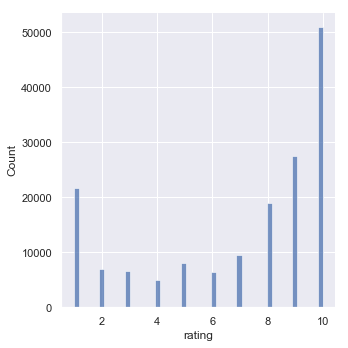

In [16]:
sns.set()
sns.displot(drugsTrain, x="rating")
plt.show()

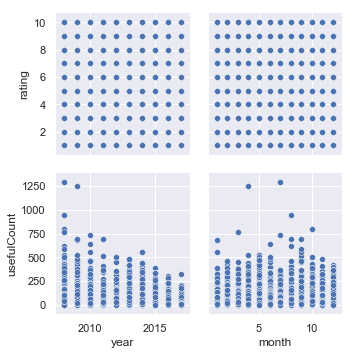

In [17]:
# sns.pairplot(drugsTrain)
sns.pairplot(
    drugsTrain,
    y_vars=["rating", "usefulCount"],
    x_vars=["year", "month"],
)

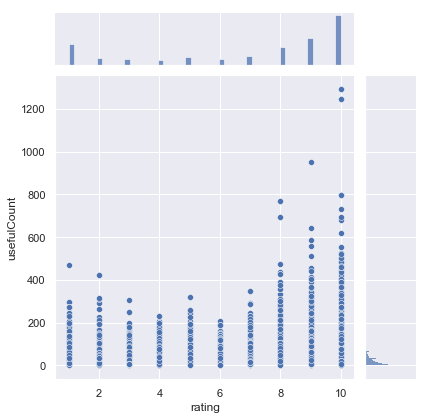

In [18]:
sns.set()
sns.jointplot(data=drugsTrain, x='rating', y='usefulCount');
# sns.displot(drugsTrain, x="rating", y="usefulCount")
plt.show()

[Text(0.5, 0, 'Month'), Text(0.5, 1.0, 'Month with year')]

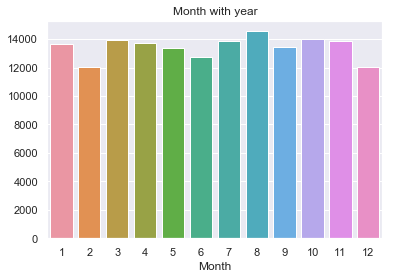

In [19]:
month_count = drugsTrain['month'].value_counts()
graph = sns.barplot(x=month_count.index, y=month_count.values)
graph.set(title='Month with year', xlabel='Month')

[Text(0.5, 0, 'rating'), Text(0.5, 1.0, 'Rating Frequency')]

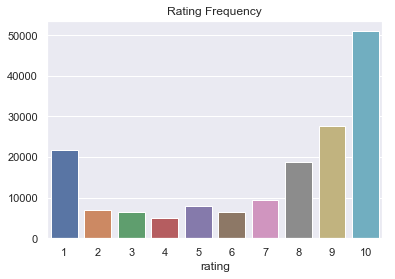

In [20]:
rating_count = drugsTrain['rating'].value_counts()
graph = sns.barplot(x=rating_count.index, y=rating_count.values)
graph.set(title='Rating Frequency', xlabel='rating')

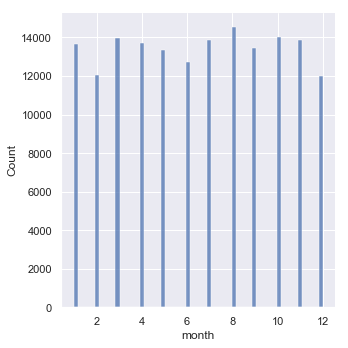

In [21]:
sns.displot(drugsTrain, x='month')

In [22]:
import glob
#import spacy
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [23]:
all_files = glob.glob("Data/*.csv")
fields = ['condition', 'drugName', 'rating']
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0) #, usecols = fields)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

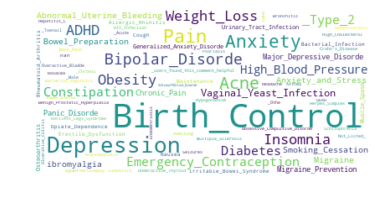

In [24]:
df_cond = df['condition'].str.replace(' ','_')
df_cond = df_cond.replace(',',' ')
condition = ' '.join(str(x) for x in df_cond)
wordcloud = WordCloud(collocations=False,background_color="white").generate(condition)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

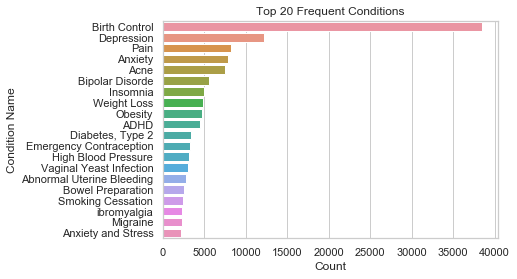

In [25]:
sns.set_style("whitegrid")
conditions = df['condition'].value_counts().head(20)
graph=sns.barplot(x=conditions.values,y=conditions.index)
graph.set(title = 'Top 20 Frequent Conditions',
               xlabel = 'Count', 
               ylabel = "Condition Name");

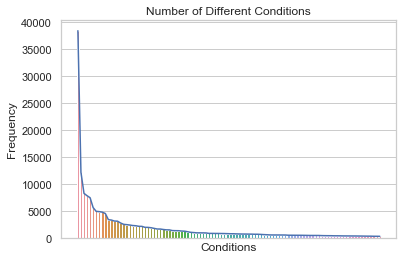

In [26]:
conditions = df['condition'].value_counts().head(100)
graph=sns.barplot(y=conditions.values,x=conditions.index)
sns.lineplot(y=conditions.values,x=conditions.index)
graph.set(title = 'Number of Different Conditions',
         xticks=[],xlabel='Conditions',
         ylabel='Frequency'
         );

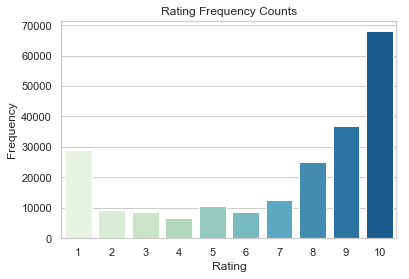

In [27]:
rating = df['rating'].value_counts()
graph1=sns.barplot(x=rating.index,y=rating.values, palette='GnBu')
graph1.set(title = 'Rating Frequency Counts',
               ylabel = 'Frequency', 
               xlabel = "Rating");

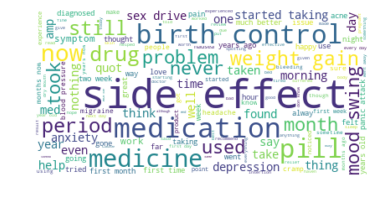

In [28]:
df_r=df['review'].str.replace(',','')
review = ' '.join(str(x) for x in df_r)
wordcloud = WordCloud(#stopwords = STOPWORDS,
                      collocations=True,
                      background_color="white",
                      min_word_length = 3,
                      collocation_threshold = 15
                      ).generate(review)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

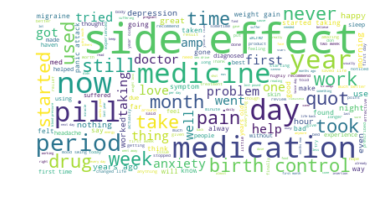

In [29]:
df_r_10=df.loc[df.rating==(10 or 9), 'review'].str.replace(',','')
review_10 = ' '.join(str(x) for x in df_r_10)
wordcloud = WordCloud(#stopwords = STOPWORDS,
                      collocations=True,
                      background_color="white",
                      min_word_length = 3,
                      collocation_threshold = 15
                      ).generate(review_10)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

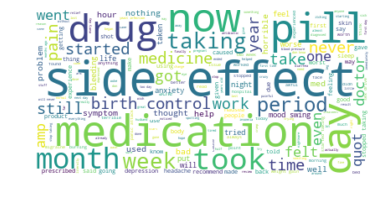

In [30]:
df_r_1=df.loc[df.rating==1, 'review'].str.replace(',','')
review_1 = ' '.join(str(x) for x in df_r_1)
wordcloud = WordCloud(#stopwords = STOPWORDS,
                      collocations=True,
                      background_color="white",
                      min_word_length = 3,
                      collocation_threshold = 15
                      ).generate(review_1)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

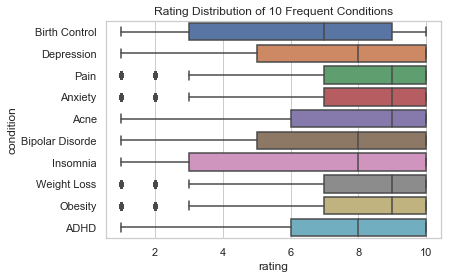

In [39]:
conditions = df['condition'].value_counts().head(10).index.tolist()
grp = df.groupby('condition')
new_grp = pd.concat([grp.get_group(c) for c in conditions])
graph=sns.boxplot(y = new_grp['condition'], x=new_grp['rating'])
graph.set(title = 'Rating Distribution of 10 Frequent Conditions');

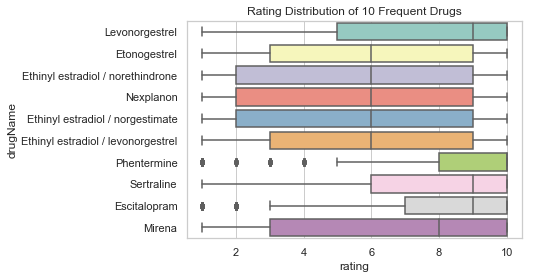

In [40]:
drugs = df['drugName'].value_counts().head(10).index.tolist()
grp_d = df.groupby('drugName')
new_grp = pd.concat([grp_d.get_group(d) for d in drugs])
graph=sns.boxplot(y = new_grp['drugName'], x=new_grp['rating'], palette='Set3')
graph.set(title = 'Rating Distribution of 10 Frequent Drugs');

Text(0, 0.5, 'Count')

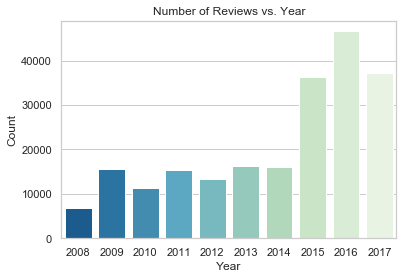

In [41]:
sns.set_style("whitegrid")
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%y')
df['year'] = pd.DatetimeIndex(df['date']).year
years = df['year'].value_counts().sort_index()

grp = df.groupby('year')
rating=[]
unique_condition=[]
review_num=[]
for y in years.index:
    rating.append(round(grp.get_group(y)['rating'].mean(), 1))
    unique_condition.append(grp.get_group(y)['condition'].nunique())
    review_num.append(grp.get_group(y).shape[0])
fig, ax1 = plt.subplots()

ax1=sns.barplot(x=years.index,y=years,palette='GnBu_r')
ax1.set_title('Number of Reviews vs. Year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Count')
#ax2 = ax1.twinx()
#ax2.plot(rating, color = 'forestgreen')
#ax2.set_ylabel('Rating', color = 'forestgreen')
#ax2.grid(False)

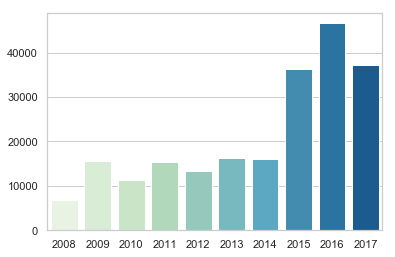

In [42]:
sns.barplot(x=years.index,y=review_num,palette='GnBu')

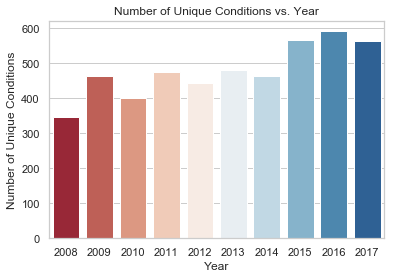

In [43]:
graph=sns.barplot(x=years.index,y=unique_condition, palette='RdBu')
graph.set(title = 'Number of Unique Conditions vs. Year', 
         ylabel='Number of Unique Conditions', xlabel='Year');

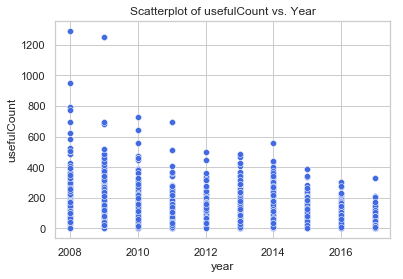

In [44]:
graph=sns.scatterplot(x = df['year'], y=df['usefulCount'],color='royalblue')
graph.set(title = 'Scatterplot of usefulCount vs. Year');

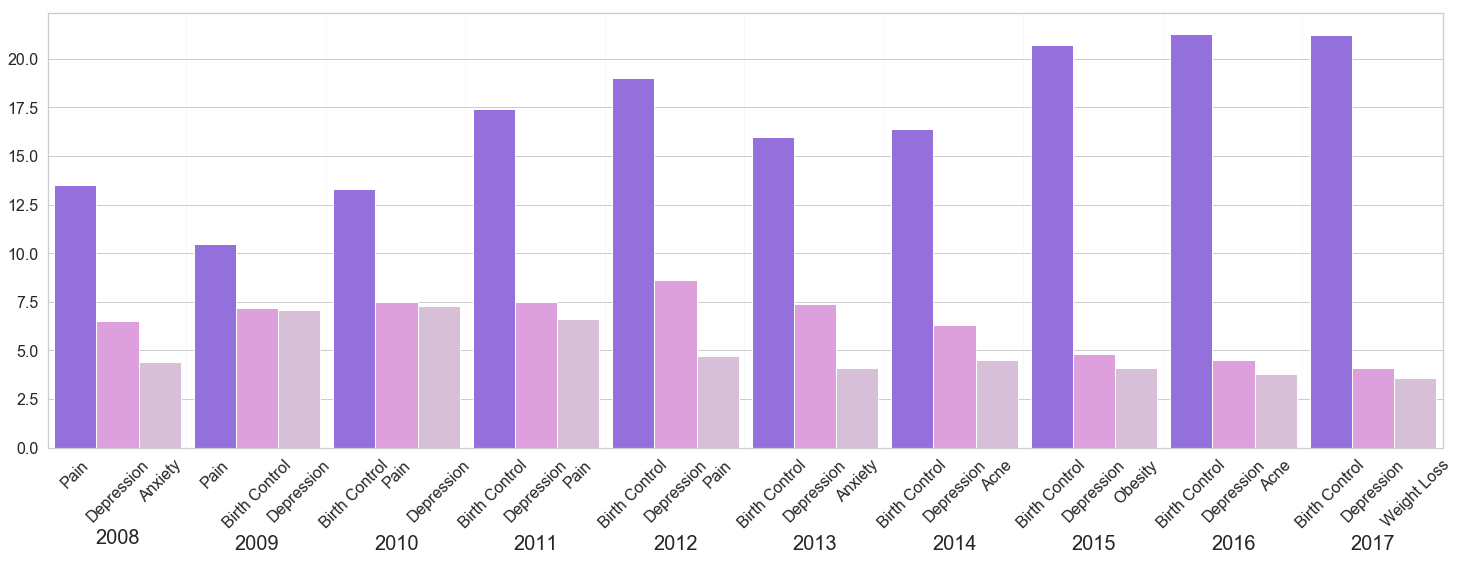

In [45]:
fig = plt.figure(figsize=(25,8))
gs = gridspec.GridSpec(1, 10)
gs.update(wspace=0, hspace=0)
y = 2008
ax0 = plt.subplot(gs[0])
top3 = round(grp.get_group(y)['condition'].value_counts(normalize=True).head(3)*100, 1)
ax0.bar(top3.index,top3, width=1, color=['mediumpurple','plum','thistle'])
ax0.set_xlabel(y, fontsize=20)
ax0.tick_params(axis='x', labelsize=16, labelrotation=45)
ax0.tick_params(axis='y', labelsize=16)
ax0.grid(axis='x')
for i in range(1, 10):
    y=2008+i
    ax = plt.subplot(gs[i], sharey = ax0)
    top3 = round(grp.get_group(y)['condition'].value_counts(normalize=True).head(3)*100, 1)
    ax.bar(top3.index, top3, width=1,color=['mediumpurple','plum','thistle'])
    #ax.set_yticklabels([])
    ax.label_outer()
    ax.spines['left'].set_visible(False)
    ax.set_xlabel(y, fontsize=20)
    ax.tick_params(axis='x', labelsize=16, labelrotation=45)
    ax.grid( axis='x')

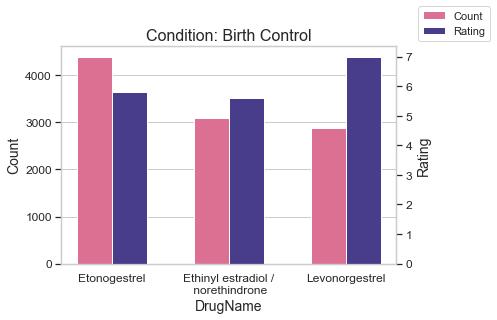

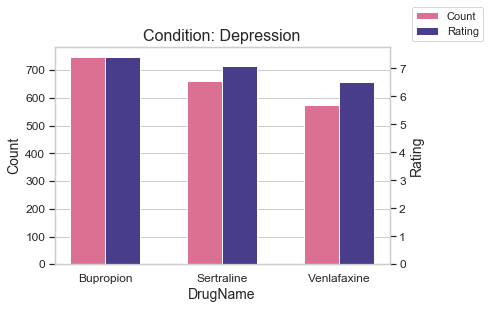

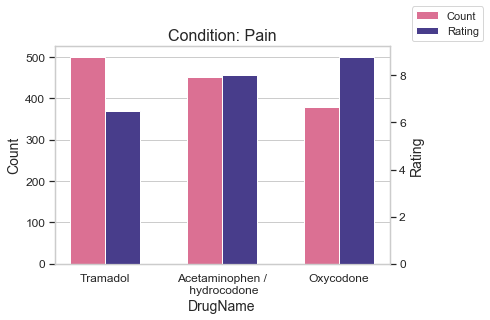

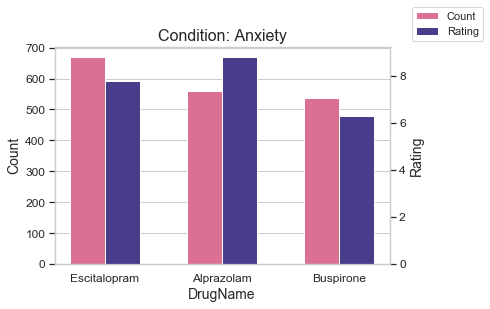

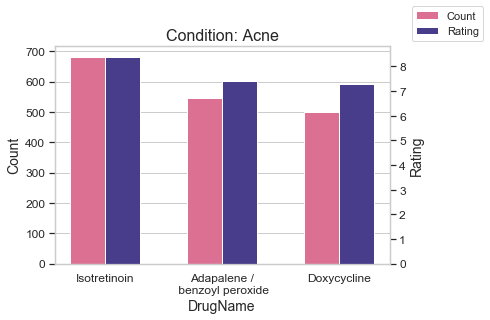

In [38]:
frequent_conditions = df['condition'].value_counts().head().index.tolist()

grp = df.groupby('condition')


for c in frequent_conditions:
    g = grp.get_group(c)
    s = g.drugName.value_counts().head(3)
    frequency = s.tolist()
    rating = []
    grp_d = g.groupby('drugName')
    for d in s.index.tolist():
        D = grp_d.get_group(d)
        rating.append(round(D['rating'].mean(), 1))
        
    xticks = [sub.replace('/', '/\n') for sub in s.index.tolist()]
    x = np.arange(3)
    fig, ax1 = plt.subplots()
    freq = ax1.bar(x-0.15, frequency, width = 0.3,color='palevioletred')
    ax1.set_ylabel('Count', fontsize=14)
    ax1.set_xlabel('DrugName', fontsize=14)
    ax1.set_xticks(x)
    ax1.grid(axis='x')
    ax1.set_title('Condition: {}'.format(c), fontsize=16)
    ax1.set_xticklabels(xticks)
    ax1.tick_params(axis='both', which='major', labelsize=12)
    ax1.tick_params(axis='both', which='minor', labelsize=20)
    ax2 = ax1.twinx()
    rt = ax2.bar(x+0.15, rating, width = 0.3, color = 'darkslateblue')
    ax2.set_ylabel('Rating', fontsize=14)
    ax2.tick_params(axis = 'x', bottom=False, labelbottom=False)
    ax2.tick_params(axis='y', which='major', labelsize=12)
    ax2.tick_params(axis='y', which='minor', labelsize=20)
    ax2.grid(False)
    ax1.legend([freq, rt], ['Count', 'Rating'],bbox_to_anchor=(1.05, 1.0), loc='lower left')

# Drug Recommender System

### DATA PREPROCESSING

In [19]:
#import required packages
import utils
import json

In [20]:
def condition_filter(condition):
    if type(condition) != str: return True
    if 'comment' in condition: return True
    if condition == 'Other': return True
    return False

def drug_filter(drug):
    return False

In [21]:
uc1_fname = "Data/drugsComTrain_raw.csv"
uc2_fname = "Data/drugsComTest_raw.csv"
wb_fname = "Data/webmd.csv"
uc1 = pd.read_csv(uc1_fname)
uc2 = pd.read_csv(uc2_fname)
wb = pd.read_csv(wb_fname)

condition_set = set()
for condition_dataset in [uc1['condition']]:
    for condition in condition_dataset:
        if condition_filter(condition):continue
        condition_set.add(condition)
c2id = {} 
for condition in condition_set:
    c2id[condition] = len(c2id)
json.dump(c2id, open('Data/c2id.json','w'))

drug_set = set()
for drug_dataset in [uc1['drugName']]:
    for drug in drug_dataset:
        if drug_filter(drug):continue
        drug_set.add(drug)
d2id = {} 
for drug in drug_set:
    d2id[drug] = len(d2id)
json.dump(d2id, open('Data/d2id.json','w'))

### RUNNING RECOMMENDER SYSTEM

In [ ]:
np.random.seed(0)

class RS:
    POS_THD = 5.5
    def __init__(self, N_condition, N_drug, range_of_compute = 10):
        self.N_drug = N_drug
        self.N_condition = N_condition
        self.rating = np.zeros((N_condition, N_drug))
        self.range_of_compute = range_of_compute
        self.condition2id = None
        self.drug2id = None
    
    def save_dict(self, condition2id_dict, drug2id_dict):
        self.condition2id = condition2id_dict
        self.drug2id = drug2id_dict

    def train(self, train_data):
        count = np.zeros((self.N_condition, self.N_drug))
        for k in range(len(train_data)):
            i,j,r,c = train_data[k]
            c = 1
            self.rating[i][j] += (r-self.POS_THD) * c
            count[i][j] += c

    def eval(self, test_data):
        total_score = 0
        model_score = 0
        for k in range(len(test_data)):
            i,j,r,c = test_data[k]
            c = 1
            total_score += c
            posc,negc = self.recommend(i)
            if r >= self.POS_THD:
                if j in posc:
                    model_score += c
            else:
                if j in negc:
                    model_score += c
        return model_score / total_score

    def recommend(self, condition):
        condition_id = condition
        array = self.rating[condition_id,:]
        order = np.argsort(-array)
        pos_choices = order[0:self.range_of_compute]
        neg_choices = order[-self.range_of_compute-1:-1]
        return [pos_choices, neg_choices]

def read_data_csv(dataset_fname):
    df = pd.DataFrame(pd.read_csv(dataset_fname))
    condition_name = df['condition'].to_numpy()
    drug_name = df['drugName'].to_numpy()
    rating = df['rating'].to_numpy()
    usefulCount = df['usefulCount'].to_numpy()


    return [condition_name, drug_name, rating, usefulCount]

def build_dataset(data_fname, c2id, d2id):
    c,d,r,u = read_data_csv(data_fname)
    dataset = []
    n = 0
    for i in range(len(c)):
        if c[i] not in c2id or d[i] not in d2id:
            n += 1
            continue
        dataset.append([c2id[c[i]], d2id[d[i]], r[i], u[i]])
    dataset = np.array(dataset)
    print(f"Discard {n} samples in dataset {data_fname}")
    return dataset

def case_study(c2id, d2id, train_dataset, test_dataseti, rs):
    for cname in ['Post Traumatic Stress Disorde', 'Birth Control',\
                  'Depression', 'Smoking Cessation',\
                  'High Blood Pressure','Acne', 'Anxiety', 'Pain']:
        i = c2id[cname]
        re_list,_ = rs.recommend(i)
        dnames = []
        for t in re_list:
            for k in d2id:
                if d2id[k] == t: dnames.append(k)
        print("Condition: {}, recommend drugs: {}\n".format(cname, dnames))

In [23]:
train_fname = "Data/drugsComTrain_raw.csv"
test_fname = "Data/drugsComTest_raw.csv"
c2id = json.load(open("Data/c2id.json"))
d2id = json.load(open("Data/d2id.json"))
train_dataset = build_dataset(train_fname, c2id, d2id)
test_dataset = build_dataset(test_fname, c2id, d2id)

rs = RS(len(c2id), len(d2id))
rs.train(train_dataset)
performance = rs.eval(test_dataset)
print(performance * 100)

case_study(c2id, d2id, train_dataset, test_dataset, rs)

Discard 1799 samples in dataset Data/drugsComTrain_raw.csv
Discard 869 samples in dataset Data/drugsComTest_raw.csv
49.53210957143127
Condition: Post Traumatic Stress Disorde, recommend drugs: ['Zoloft', 'Sertraline', 'Prazosin', 'Quetiapine', 'Asenapine', 'Desvenlafaxine', 'Lamotrigine', 'Pristiq', 'Saphris', 'Paroxetine']

Condition: Birth Control, recommend drugs: ['Levonorgestrel', 'Skyla', 'Mirena', 'Copper', 'Etonogestrel', 'NuvaRing', 'Ethinyl estradiol / etonogestrel', 'Ethinyl estradiol / norgestimate', 'Ethinyl estradiol / levonorgestrel', 'Implanon']

Condition: Depression, recommend drugs: ['Bupropion', 'Escitalopram', 'Citalopram', 'Sertraline', 'Desvenlafaxine', 'Pristiq', 'Lexapro', 'Fluoxetine', 'Zoloft', 'Venlafaxine']

Condition: Smoking Cessation, recommend drugs: ['Varenicline', 'Chantix', 'Bupropion', 'Nicotine', 'Zyban', 'Nicoderm CQ', 'Commit', 'Nicotrol Inhaler', 'Nicorette', 'Habitrol']

Condition: High Blood Pressure, recommend drugs: ['Olmesartan', 'Nebivolol

<h3> RUN THIS CODE AFTER YOU'RE DONE WORKING. IT WILL REMOVE THE BIG .CSV FILES THAT CANNOT BE PUSHED TO GITHUB.

In [268]:
import os
os.remove("Data\drugsComTest_raw.csv")
os.remove("Data\drugsComTrain_raw.csv")
os.remove("Data\webmd.csv")